<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnosis

## Introduction
---



In the field of healthcare, Machine Learning is widely used in various fields of science like to identify the rare diseases, understanding the patterns to predict a rare disease and so on. According to the survey conducted by World Health Organization, 17.9 million total global deaths occur due to heart attacks and strokes in 2016 [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))]. The application of algorithms and interpretation of the patterns can be helpful in saving numerous people lives by anticipating the condition of the disease in advance. This project is focused on determining whether the patient has a heart disease or not by taking into consideration the UCI dataset. The dataset originally contained seventy six attributes which were collected from four different databases and fourteen attributes are used for this project [[2](https://www.kaggle.com/ronitf/heart-disease-uci)].

## Import Libraries and Tools

In [1]:
# Import standard library
import numpy as np
import pandas as pd

# Import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

import IPython
# Plotly Configuration
# Ref : https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Dataset Description
Taken from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

---

### Attribute Information:

1. **age**: the patient's age in years
2. **sex**: the patient's gender (1=male; 0=female)
3. **cp**: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: the patient's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: the patient's cholesterol measurement in mg/dl
6. **fbs**: the patient's fasting blood sugar (> 120 mg/dl, 1=true; 0=false)
7. **restecg**: resting electrocardiographic results (3 values)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: the patient's maximum heart rate achieved
9. **exang**: exercise induced angina (1=yes; 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (3 values)
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: a blood disorder called thalassemia (3=normal; 6=fixed defect; 7=reversable defect)
14. **target**: heart disease (0=no; 1=yes)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abuwildanm/Heart-Disease/master/heart.csv')
df = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
feature_discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
feature_continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hypothesis
---

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) let's take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [[1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)], ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [[2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests)].

Looking at information of heart disease risk factors led us to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [[3](https://www.bhf.org.uk/informationsupport/risk-factors)]. According to another source [[4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)], the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Data Manipulation

In [7]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
                'max_heart_rate_achieved', 'exercise_induced_angina', 
                'st_depression', 'st_slope', 'num_major_vessels', 
                'thalassemia', 'target']

col_discrete = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
                'thalassemia']
col_continuous = ['age', 'resting_blood_pressure', 'cholesterol', 
                  'max_heart_rate_achieved', 'st_depression']

In [8]:
data = data[data['thalassemia'] > 0]
data.reset_index(drop=True, inplace=True)
df = df[df['thal'] > 0]
df.reset_index(drop=True, inplace=True)

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [10]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

### Data Distribution

In [11]:
data[col_discrete].iplot(kind='hist', subplots=True, title='Discrete Attribute Distribution')

In [12]:
data[col_continuous].iplot(kind='hist', subplots=True, title='Continuous Attribute Distribution')

In [13]:
data['target'].iplot(kind='hist', subplots=True, title='Target Distribution')

### Discrete Attribute

In [14]:
def plot_discrete(variable, term):
    cross_table = pd.crosstab(data['target'], data[variable])

    # Visualisation
    x = cross_table.index
    data_bar = []
    for col in cross_table.columns:
        bar = go.Bar(name=col, x=x, y=cross_table[col])
        data_bar.append(bar)

    fig = go.Figure(data=data_bar)
    fig.update_layout(barmode='group', 
                    title='The number of heart disease sufferers in terms of ' + term, 
                    xaxis_title='Diagnosis of Heart Disease (0=no; 1=yes)', 
                    yaxis_title='Frequency')
    fig.show()

In [15]:
plot_discrete('sex', 'Gender')

In [16]:
plot_discrete('chest_pain_type', 'Chest Pain Type')

In [17]:
plot_discrete('fasting_blood_sugar', 'Fasting Blood Sugar')

In [18]:
plot_discrete('rest_ecg', 'Resting ECG Results')

In [19]:
plot_discrete('exercise_induced_angina', 'Exercise Induced Angina')

In [20]:
plot_discrete('st_slope', 'the slope of the peak exercise ST segment')

In [21]:
plot_discrete('num_major_vessels', 'Number of Major Vessels')

In [22]:
plot_discrete('thalassemia', 'Thalassemia')

### Continuous Attribute

In [23]:
trace_splom = go.Splom(dimensions=[dict(label='age', values=data['age']),
                                   dict(label='resting_blood_pressure', values=data['resting_blood_pressure']),
                                   dict(label='cholesterol', values=data['cholesterol']),
                                   dict(label='max_heart_rate_achieved', values=data['max_heart_rate_achieved']),
                                   dict(label='st_depression', values=data['st_depression'])],
                      text=data['target'],
                      marker=dict(color=data['target'],
                                  colorscale='Bluered', 
                                  showscale=False, 
                                  line_color='white', 
                                  line_width=0.5)
                      )
fig = go.Figure(data=trace_splom)
fig.update_layout(title='Continuous Attribute Scatter', width=1000, height=1000)
fig.show()

### Attribute Correlation

In [24]:
# Pearson Product Correlation
corr = data.corr()

hm = go.Heatmap(z=corr, x=corr.index, y=corr.columns, colorscale='RdBu', reversescale=True)
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=hm, layout=layout)
fig.show()

In [25]:
corr['target'].sort_values(ascending = False)

target                     1.000000
max_heart_rate_achieved    0.430447
cholesterol               -0.086861
resting_blood_pressure    -0.145564
age                       -0.226722
num_major_vessels         -0.394139
st_depression             -0.430131
Name: target, dtype: float64

Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1.


- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.


- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.


- When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.


- However, We can see that the **max_heart_rate_achieved** are mildly positively correlated with target variable. 

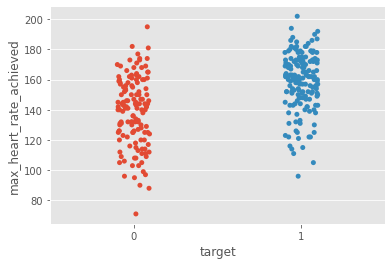

In [26]:
sns.stripplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

Interpretation

We can see that those people suffering from heart disease (**target** = 1) have relatively higher heart rate (**max_heart_rate_achieved**) as compared to people who are not suffering from heart disease (**target** = 0).

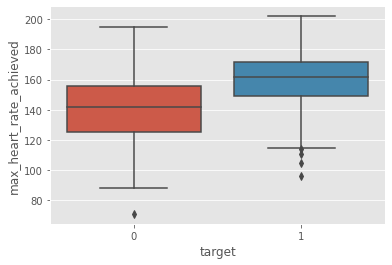

In [27]:
sns.boxplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

## Preprocessing

### Duplication Check

In [28]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [29]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Values Check

In [30]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier Detection

In [31]:
box = [go.Box(y=df[col], name=col) for col in df]
layout = go.Layout(title='Outlier Detection')
fig = go.Figure(data=box, layout=layout)
fig.show()

In [32]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# lowerBound = Q1 - 1.5*IQR
# upperBound = Q3 + 1.5*IQR

# original = df.copy()
# df = df[~((df.iloc[:, :-1] < lowerBound) | (df.iloc[:, :-1] > upperBound)).any(axis=1)]
# df.reset_index(drop=True, inplace=True)

# print('Data dengan outlier              : ', original.shape)
# print('Data setelah outlier dihilangkan : ', df.shape)

### Feature Selection

Feature importance gives us a score for each feature of the data, the higher the score more important or relevant is the feature towards the output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


[0.06860477 0.05126197 0.11794919 0.05996883 0.05747921 0.02153461
 0.03749165 0.09401032 0.10008503 0.07875012 0.06439108 0.12300753
 0.12546571]

10 Most Important Features


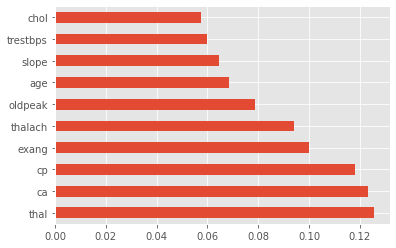

In [33]:
X = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column 

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print('\n10 Most Important Features')
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Feature Scaling

In [34]:
df = pd.get_dummies(df)
target = df['target'].copy()
df.drop(columns='target', inplace=True)
df['target'] = target
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1


In [35]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df[feature_continuous])
mms_df = pd.DataFrame(data=mms_df, columns=df[feature_continuous].columns)

In [36]:
mms_df.iplot(kind='hist', subplots=True, title='Min-Max Distribution')

In [37]:
ss = StandardScaler()
ss_df = ss.fit_transform(df[feature_continuous])
ss_df = pd.DataFrame(ss_df, columns=df[feature_continuous].columns)

In [38]:
ss_df.iplot(kind='hist', subplots=True, title='Z-Transform Distribution')

In [39]:
# df[feature_continuous] = mms_df.copy()
df[feature_continuous] = ss_df.copy()

## Split the data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, stratify=df.iloc[:, -1])

## Build Models

### Support Vector Machine

In [41]:
svc = SVC()
svc.fit(x_train, y_train)
print('Train Score : ', svc.score(x_train, y_train))
print('Test Score : ', svc.score(x_test, y_test))

Train Score :  0.9380952380952381
Test Score :  0.8111111111111111


In [42]:
cvSVC = pd.DataFrame(cross_validate(svc, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvSVC

,fit_time,score_time,test_score,train_score
0,0.008216,0.001394,0.900000,0.922222
1,0.005523,0.001407,0.833333,0.918519
2,0.005623,0.001380,0.866667,0.925926
3,0.005684,0.001359,0.966667,0.929630
4,0.005646,0.001357,0.833333,0.925926
5,0.005432,0.001298,0.800000,0.933333
6,0.005687,0.001324,0.866667,0.929630
7,0.005594,0.001315,0.833333,0.929630
8,0.005363,0.001347,0.766667,0.944444
9,0.005669,0.001343,0.766667,0.937037


In [43]:
cvSVC.mean()

fit_time       0.005844
score_time     0.001352
test_score     0.843333
train_score    0.929630
dtype: float64

### Random Forest

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score : ', rf.score(x_train, y_train))
print('Test Score : ', rf.score(x_test, y_test))

Train Score :  1.0
Test Score :  0.8444444444444444


In [45]:
cvRF = pd.DataFrame(cross_validate(rf, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvRF

,fit_time,score_time,test_score,train_score
0,0.152058,0.009488,0.900000,1.0
1,0.143098,0.008840,0.800000,1.0
2,0.145466,0.008681,0.866667,1.0
3,0.142380,0.008686,0.933333,1.0
4,0.139456,0.008755,0.800000,1.0
5,0.142143,0.008649,0.800000,1.0
6,0.141202,0.008830,0.733333,1.0
7,0.143114,0.008833,0.900000,1.0
8,0.140062,0.008590,0.766667,1.0
9,0.141022,0.008918,0.766667,1.0


In [46]:
cvRF.mean()

fit_time       0.143000
score_time     0.008827
test_score     0.826667
train_score    1.000000
dtype: float64

### Multi Layer Perceptron

In [47]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
print('Train Score : ', mlp.score(x_train, y_train))
print('Test Score : ', mlp.score(x_test, y_test))

Train Score :  0.9285714285714286
Test Score :  0.8333333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [48]:
cvMLP = pd.DataFrame(cross_validate(mlp, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvMLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

,fit_time,score_time,test_score,train_score
0,0.511123,0.002314,0.900000,0.962963
1,0.471484,0.002470,0.833333,0.962963
2,0.471374,0.002389,0.833333,0.951852
3,0.523819,0.002463,0.900000,0.955556
4,0.480837,0.002391,0.900000,0.955556
5,0.494163,0.002375,0.866667,0.955556
6,0.472736,0.002387,0.766667,0.966667
7,0.476763,0.002402,0.833333,0.948148
8,0.484187,0.002537,0.766667,0.955556
9,0.477209,0.002427,0.766667,0.966667


In [49]:
cvMLP.mean()

fit_time       0.486369
score_time     0.002415
test_score     0.836667
train_score    0.958148
dtype: float64

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train, y_train)
print('Train Score : ', KNN.score(x_train, y_train))
print('Test Score : ', KNN.score(x_test, y_test))

Train Score :  0.8428571428571429
Test Score :  0.7777777777777778


In [51]:
cvKNN = pd.DataFrame(cross_validate(KNN, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvKNN

,fit_time,score_time,test_score,train_score
0,0.003769,0.003599,0.900000,0.855556
1,0.002512,0.002904,0.800000,0.862963
2,0.002468,0.003196,0.833333,0.851852
3,0.002519,0.002964,0.966667,0.844444
4,0.002423,0.003038,0.900000,0.848148
5,0.002402,0.002894,0.733333,0.866667
6,0.002655,0.003163,0.866667,0.855556
7,0.002455,0.002882,0.866667,0.851852
8,0.002388,0.002862,0.766667,0.862963
9,0.002408,0.002842,0.800000,0.855556


In [52]:
cvKNN.mean()

fit_time       0.002600
score_time     0.003034
test_score     0.843333
train_score    0.855556
dtype: float64

### Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train, y_train)
print('Train Score : ', nb.score(x_train, y_train))
print('Test Score : ', nb.score(x_test, y_test))

Train Score :  0.8761904761904762
Test Score :  0.7888888888888889


In [54]:
cvnb = pd.DataFrame(cross_validate(nb, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvnb

,fit_time,score_time,test_score,train_score
0,0.004606,0.001515,0.833333,0.844444
1,0.002330,0.001125,0.800000,0.833333
2,0.002267,0.001159,0.833333,0.851852
3,0.002254,0.001125,0.900000,0.829630
4,0.002254,0.001119,0.833333,0.859259
5,0.002261,0.001116,0.833333,0.848148
6,0.002281,0.001162,0.633333,0.755556
7,0.002180,0.001106,0.900000,0.844444
8,0.002263,0.001114,0.733333,0.814815
9,0.002200,0.001259,0.800000,0.851852


In [55]:
cvnb.mean()

fit_time       0.002490
score_time     0.001180
test_score     0.810000
train_score    0.833333
dtype: float64

### Keras Neural Network

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Dense
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

#### Hyperparameter Tuning for Batch Size and Number of Epoch

In [59]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", input_dim = 29, units = 12, kernel_initializer = "uniform"))
    model.add(Dense(activation = "relu", units = 12, kernel_initializer = "uniform"))
    model.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# split into input (X) and output (Y) variables
X = x_train
Y = y_train

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857143 using {'batch_size': 80, 'epochs': 100}
0.828571 (0.011664) with: {'batch_size': 10, 'epochs': 10}
0.838095 (0.029354) with: {'batch_size': 10, 'epochs': 50}
0.819048 (0.033672) with: {'batch_size': 10, 'epochs': 100}
0.752381 (0.064242) with: {'batch_size': 20, 'epochs': 10}
0.838095 (0.037495) with: {'batch_size': 20, 'epochs': 50}
0.828571 (0.020203) with: {'batch_size': 20, 'epochs': 100}
0.642857 (0.116642) with: {'batch_size': 40, 'epochs': 10}
0.847619 (0.017817) with: {'batch_size': 40, 'epochs': 50}
0.833333 (0.033672) with: {'batch_size': 40, 'epochs': 100}
0.714286 (0.151635) with: {'batch_size': 60, 'epochs': 10}
0.857143 (0.023328) with: {'batch_size': 60, 'epochs': 50}
0.847619 (0.024281) with: {'batch_size': 60, 'epochs': 100}
0.542857 (0.034993) with: {'batch_size': 80, 'epochs': 10}
0.833333 (0.017817) with: {'batch_size': 80, 'epochs': 50}
0.857143 (0.023328) with: {'batch_size': 80, 'epochs': 100}
0.542857 (0.034993) with: {'batch_size': 100, 'epochs':

#### Build Model

In [62]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 29, units = 12, kernel_initializer = "uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation = "relu", units = 12, kernel_initializer = "uniform"))

# Adding the output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Fit and Validation Split of 33% Training Data

Keras can separate a portion of your training data into a validation dataset and evaluate the performance of the model on that validation dataset each epoch.

We can do this by setting the validation_split argument on the fit() function to a percentage of the size of training dataset.

For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of training data held back for validation.

In [63]:
classifier.fit(x_train, y_train,
               validation_split=0.33,
               batch_size = grid_result.best_params_.get('batch_size'), 
               epochs = grid_result.best_params_.get('epochs'))

Train on 140 samples, validate on 70 samples
Epoch 1/100
140/140 [==============================] - 0s 3ms/step - loss: 0.6931 - acc: 0.5357 - val_loss: 0.6930 - val_acc: 0.6286
Epoch 2/100
140/140 [==============================] - 0s 48us/step - loss: 0.6930 - acc: 0.5857 - val_loss: 0.6929 - val_acc: 0.6000
Epoch 3/100
140/140 [==============================] - 0s 43us/step - loss: 0.6928 - acc: 0.5786 - val_loss: 0.6927 - val_acc: 0.6143
Epoch 4/100
140/140 [==============================] - 0s 40us/step - loss: 0.6927 - acc: 0.5786 - val_loss: 0.6925 - val_acc: 0.6143
Epoch 5/100
140/140 [==============================] - 0s 44us/step - loss: 0.6925 - acc: 0.5786 - val_loss: 0.6923 - val_acc: 0.6143
Epoch 6/100
140/140 [==============================] - 0s 41us/step - loss: 0.6923 - acc: 0.5714 - val_loss: 0.6920 - val_acc: 0.6143
Epoch 7/100
140/140 [==============================] - 0s 41us/step - loss: 0.6920 - acc: 0.6214 - val_loss: 0.6916 - val_acc: 0.6571
Epoch 8/100
140/14

#### Training Summary

In [64]:
score = classifier.evaluate(x_train, y_train)
print('Train loss :', score[0])
print('Train accuracy :', score[1])

210/210 [==============================] - 0s 47us/step
Train loss : 0.3152636292434874
Train accuracy : 0.8809523792493911


#### Test Summary

In [65]:
score = classifier.evaluate(x_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

90/90 [==============================] - 0s 74us/step
Test loss : 0.38688038653797574
Test accuracy : 0.8444444391462538


## Model Evaluation

### Keras Neural Network

####Confusion Matrix

In [66]:
y_pred = classifier.predict(x_test)

Accuracy of the model :  0.8444444444444444


Text(0.5, 15.0, 'Predicted label')

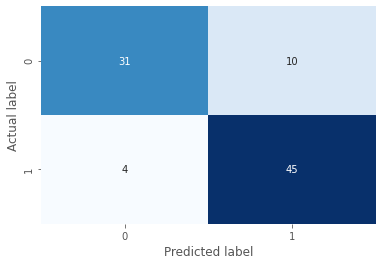

In [67]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d",cbar = False)

#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy of the model : ', accuracy)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Conclusion